# Prakiraan Cuaca


Dalam Ilmu Data (Data Science), prakiraan cuaca adalah aplikasi Time Series Forecasting di mana kami menggunakan data dan algoritme deret waktu (*time-series*) untuk membuat prakiraan untuk waktu tertentu.

Disini kita akan mempelajari cara meramalkan cuaca menggunakan keterampilan Ilmu Data dengan menggunakan Python.


Prakiraan cuaca adalah aktifitas untuk meramalkan kondisi cuaca untuk lokasi dan waktu tertentu. Dengan menggunakan data cuaca dan algoritma tertentu, dimungkinkan untuk memprediksi kondisi cuaca selama `n` hari berikutnya.

Untuk prakiraan cuaca menggunakan Python, kita membutuhkan *dataset* yang berisi data cuaca historis berdasarkan lokasi tertentu. Kita menemukan contoh kumpulan data (*dataset*) di Kaggle berdasarkan data cuaca harian di New Delhi. Dataset ini dapat kita gunakan untuk menghitung prakiraan cuaca. Kita dapat mengunduh dataset dari sini: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

Pada bagian di bawah ini, kita akan mempelajari bagaimana kita dapat menganalisis dan meramalkan cuaca menggunakan Python.


Sekarang mari kita mulai dengan mengimpor library Python dan kumpulan data (*dataset*) yang kita perlukan.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("DailyDelhiClimateTrain.csv")
print(data.head())


         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


Mari kita lihat statistik deskriptif dari data ini sebelum melanjutkan.


In [3]:
print(data.describe())


          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


Sekarang mari kita lihat informasi tentang semua kolom dalam kumpulan data (*dataset*).


In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


Kolom tanggal dalam dataset ini tidak memiliki tipe data datetime. Kita akan mengubahnya bila diperlukan. Mari kita lihat suhu rata-rata di Delhi selama beberapa tahun terakhir.


In [5]:
figure = px.line(data, x="date", y="meantemp", title='Mean Temperature in Delhi Over the Years')
figure.show()


Sekarang mari kita lihat kelembapan di Delhi selama beberapa tahun terakhir.


In [6]:
figure = px.line(data, x="date", y="humidity", title='Humidity in Delhi Over the Years')
figure.show()


Sekarang mari kita lihat kecepatan angin di Delhi selama beberapa tahun terakhir.


In [7]:
figure = px.line(data, x="date", y="wind_speed", title='Wind Speed in Delhi Over the Years')
figure.show()


Hingga tahun 2015, kecepatan angin lebih tinggi pada musim hujan (Agustus & September) dan musim hujan mundur (Desember & Januari). Setelah tahun 2015, tidak ada anomali kecepatan angin pada musim hujan. Sekarang mari kita lihat hubungan antara suhu dan kelembaban.


In [8]:
figure = px.scatter(data_frame = data, x="humidity", y="meantemp", size="meantemp", trendline="ols", title = "Relationship Between Temperature and Humidity")
figure.show()


Ada korelasi negatif antara suhu dan kelembapan di Delhi. Ini berarti suhu yang lebih tinggi menghasilkan kelembaban yang rendah dan suhu yang lebih rendah menghasilkan kelembaban yang tinggi.


**Menganalisa Perubahan Suhu**

Sekarang mari kita menganalisis perubahan suhu di Delhi selama beberapa tahun terakhir. Untuk tugas ini, pertama-tama kita akan mengkonversi tipe data kolom tanggal menjadi waktu (**datetime**). Kemudian kita akan menambahkan dua kolom baru di dataset untuk nilai tahun dan bulan.


Berikut cara untuk mengubah tipe data dan mengekstrak data tahun dan bulan dari kolom tanggal.


In [9]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())


        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


Sekarang mari kita lihat perubahan suhu di Delhi selama beberapa tahun.


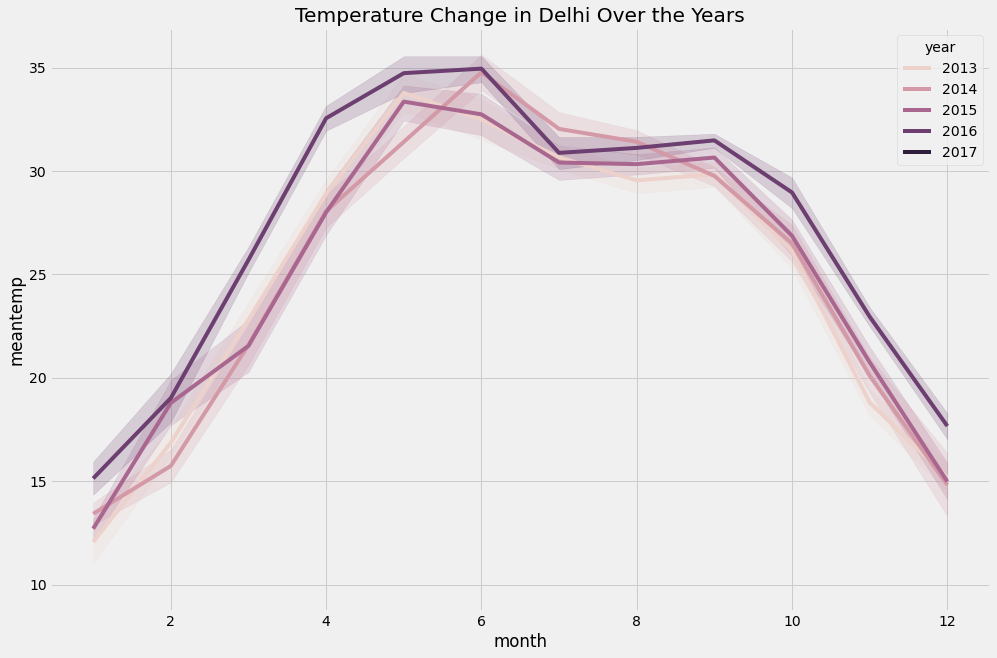

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()


Meskipun 2017 bukan tahun terpanas di musim panas, kita bisa melihat kenaikan suhu rata-rata Delhi setiap tahunnya.


Sekarang mari beralih ke rencana pembuatan prakiraan cuaca. kita akan menggunakan model nabi Facebook untuk tugas ini. **Facebook prophet model** adalah salah satu teknik terbaik untuk peramalan deret waktu. Jika kita belum pernah menggunakan model ini sebelumnya, kita dapat menginstalnya di sistem kita dengan menggunakan perintah yang disebutkan di bawah ini di command prompt atau terminal komputer kita.


In [12]:
pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Model 'prophet' menerima data waktu bernama "ds", dan suhu rata-rata diberi label sebagai "y". Jadi mari kita konversi data ke dalam format ini.


In [13]:
forecast_data = data.rename(columns = {"date": "ds", "meantemp": "y"})
print(forecast_data)


             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


Sekarang bagaimana kita dapat menggunakan 'Facebook prophet model' untuk mengkalkulasi/membuat prakiraan cuaca menggunakan Python.


In [14]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgd8dooer/2ha8zxac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgd8dooer/20dotwn9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59868', 'data', 'file=/tmp/tmpgd8dooer/2ha8zxac.json', 'init=/tmp/tmpgd8dooer/20dotwn9.json', 'output', 'file=/tmp/tmpgd8dooer/prophet_modelfl3biesj/prophet_model-20230216105738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:57:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:57:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Jadi inilah cara untuk menganalisis dan meramalkan cuaca menggunakan Python.


**Ringkasan**

Prakiraan cuaca adalah aktifitas pekerjaan meramalkan kondisi cuaca untuk lokasi dan waktu tertentu. Dengan menggunakan data cuaca dan algoritma tertentu, dimungkinkan untuk memprediksi kondisi cuaca selama `n` hari berikutnya.
